In [1]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
train=pd.read_csv('..\train.csv')
test=pd.read_csv('..\\test.csv')
df = train.append(test, ignore_index=True)
df.drop(columns=['Cabin'],inplace=True)

In [2]:
#trying to find coorelation among categorical features
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('\n\n')
#proves that females survived more
print(df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('\n\n')
print(df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('\n\n')
print(df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363



      Sex  Survived
0  female  0.742038
1    male  0.188908



   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000



   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
7      9       NaN


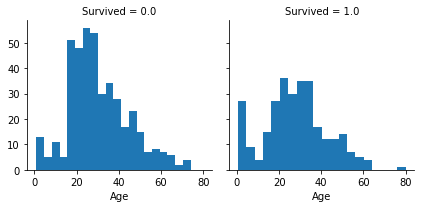

In [3]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age', bins=20)
#shows that infants and kids survived more
#also shows that a large number of adults between age 20-40 did not make it

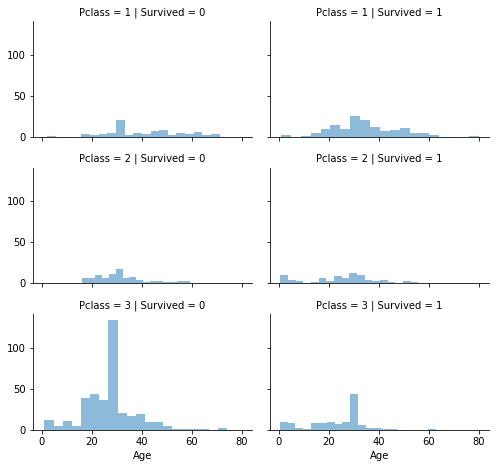

In [60]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [4]:
#handling missing values
df.isnull().sum()
#filling the age column with mean age
mn=df.Age.mean()
df.Age.fillna(value=mn,inplace=True)
#finally filling the embarked
df.Embarked.fillna(value='S',inplace=True)
df.isnull().sum()
#converting age into numeric
df.loc[df['Age']<=20,'Age']=0
df.loc[(df['Age']>20) & (df['Age']<=40),'Age']=1
df.loc[(df['Age']>40) & (df['Age']<=60),'Age']=2
df.loc[(df['Age']>60) & (df['Age']<100),'Age']=3
#creating new features
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=0
df.loc[df['FamilySize'] == 1,'IsAlone']=1
df.drop(columns=['Parch','SibSp','FamilySize'],axis=0,inplace=True)
#dropping more columns 
df.drop(columns=['Name','Fare','Ticket','PassengerId'],axis=0,inplace=True)
#converting Embarked into numeric
df.Embarked.unique()
df.loc[df['Embarked']=='S','Embarked']=0
df.loc[df['Embarked']=='C','Embarked']=1
df.loc[df['Embarked']=='Q','Embarked']=2
#converting Sex into numeric
df.Sex.unique()
df.loc[df['Sex']=='male','Sex']=0
df.loc[df['Sex']=='female','Sex']=1
#finally unappending train and test
df_train=df.iloc[0:891,:]
df_test=df.iloc[891:1309,:]

In [5]:
#fitting our model
X_train=df_train.drop(columns='Survived')
Y_train=df_train.Survived
X_test=df_test.drop(columns='Survived')
model=tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
Y_pred=Y_pred.astype(int)
sub=pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived":Y_pred
})
sub.to_csv('mysecondKaggle.csv',encoding='utf-8',index=False)